In [1]:
import pandas as pd
import os
PROJ_ROOT = os.path.join(os.pardir)

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import operator

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook as tqdm
import re
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

data_path = os.path.join(PROJ_ROOT, 
                         'data')

In [2]:
full_data=pd.read_csv(data_path+'\\'+'temp_full_data.csv')
tweets=full_data.full_text

## LDA Topic Modeling

### Load necessary files

In [3]:
full_data=pd.read_csv(data_path+'\\'+'temp_full_data.csv')

files = ['all_tokens.pkl','tweets_gdict.pkl','corpus.pkl',
         'texts.pkl']
data_path = os.path.join(PROJ_ROOT, 
                         'data')
for fn in tqdm(files):
    var=re.findall(r'(.*)\.',fn)[0]
    globals()[var] = pickle.load( open( data_path+'\\'+fn, 'rb' ) )

  0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
coherence_values = pickle.load(open(data_path+'\\'+'coherence_values.pkl','rb'))

### Plot results of the naive models

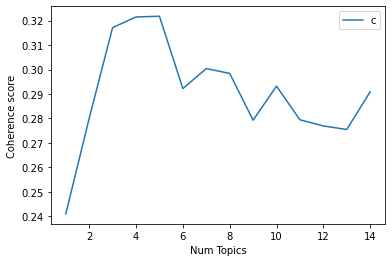

In [5]:
#plot the coherence values for different topic numbers
limit=15; start=1
x=range(start, limit)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend('coherence_values', loc='best')
plt.show()

In [6]:
from pprint import pprint
#print the coherence values, and the index & cv for the highest cv value
pprint(coherence_values)
index, value = max(enumerate(coherence_values), key=operator.itemgetter(1))
num_topics = len(coherence_values[:index+1])
print(index, value)
print(num_topics, ' number of topics to be used')

[0.2409125597912077,
 0.2800806042947272,
 0.3171639175987016,
 0.3215055649681553,
 0.32179694064705433,
 0.2921852213487059,
 0.30038541763491633,
 0.2984128495380771,
 0.27927221557560233,
 0.2932006816855416,
 0.2794232567110878,
 0.2769115091589724,
 0.27545853819011845,
 0.29085384301829936]
4 0.32179694064705433
5  number of topics to be used


### Load and view the parameters of the best model (5 Topics)

In [7]:
models = pickle.load( open( data_path+'\\'+'all_lda_models_5t.pkl', 'rb' ) )
model_results = pickle.load(open(data_path+'\\'+'model_results_5t.pkl','rb'))

In [8]:
#create a df of the param values and results
lda_tuning = pd.DataFrame(model_results)
lda_tuning.head()

,validation_set,topics,alpha,beta,coherence
0,100% Corpus,5,0.01,0.01,0.318425
1,100% Corpus,5,0.01,0.31,0.334623
2,100% Corpus,5,0.01,0.61,0.302123
3,100% Corpus,5,0.01,0.91,0.410875
4,100% Corpus,5,0.01,symmetric,0.302739


In [9]:
# find the row with the coherence value and display the parameters
idx =lda_tuning['coherence'].idxmax(axis=0)
lda_tuning.iloc[idx]

validation_set    100% Corpus
topics                      5
alpha                    0.01
beta                     0.91
coherence            0.410875
Name: 3, dtype: object

### View the top words of the LDA model

In [10]:
#display the topics along with the top 15 words for each topic
pprint(models[idx].print_topics(num_words=15))

[(0,
  '0.002*"️" + 0.002*"account_42_percent" + 0.002*"shot_javits_center_75" + '
  '0.002*"percent_queen_site_mayor" + 0.002*"people_outside_city" + '
  '0.002*"bill_de_blasio" + 0.002*"/j" + 0.001*"vaccine_december_2019" + '
  '0.001*"look_modify_time" + 0.001*"2_dose_authorize" + '
  '0.001*"vaccinate_compromise_effectiveness" + 0.001*"dr_tam_cpho_naci" + '
  '0.001*"dr_fauci" + 0.001*"baric_review_moderna" + '
  '0.001*"huge_exclusive_dr_ralph"'),
 (1,
  '0.007*"coronavirus" + 0.005*"death" + 0.004*"new_case" + 0.003*"░_░_░_░" + '
  '0.002*"total_death" + 0.002*"today" + 0.002*"total_case" + 0.002*"staysafe" '
  '+ 0.002*"today_recovery" + 0.002*"total_active_case" + '
  '0.002*"coronavirus_19_sarscov2_staysafe_source" + 0.002*"total_recovery" + '
  '0.002*"coronatrackernepal_bot_telegram" + 0.002*"coronaviruspandemic" + '
  '0.002*"active"'),
 (2,
  '0.005*"immunity" + 0.002*"doctor_policy_vaccine" + '
  '0.002*"insurance_pharmaceutical_biotech" + 0.002*"medtech_retweet" + '
  '0

In [11]:
#display the pLDAvis plot to visualize the LDA model
vis = pyLDAvis.gensim.prepare(models[idx], corpus, tweets_gdict)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.204887  0.105492       1        1  57.863800
3      0.189962 -0.109929       2        1  36.110953
2     -0.133270  0.011968       3        1   2.190706
1     -0.123728 -0.012360       4        1   1.928249
0     -0.137852  0.004830       5        1   1.906292, topic_info=                                              Term          Freq  \
23                                         vaccine  23218.000000   
6                                      coronavirus  31583.000000   
37                                            dose   4080.000000   
992                                          death   1404.000000   
271                                       immunity    623.000000   
...                                            ...           ...   
6953                                           🇨_🇳     10.395436   
4550                                             🇷      9.846788   
3230                                             ️     27.379303   
35293  coronavirus vaccine_thankyoupm_sheikhhasina      9.885872   
826                                       dr_fauci     11.575414   

              Total Category  logprob  loglift  
23     23218.000000  Default  30.0000  30.0000  
6      31583.000000  Default  29.0000  29.0000  
37      4080.000000  Default  28.0000  28.0000  
992     1404.000000  Default  27.0000  27.0000  
271      623.000000  Default  26.0000  26.0000  
...             ...      ...      ...      ...  
6953      13.327733   Topic5  -7.1072   3.7115  
4550      12.701616   Topic5  -7.1615   3.7054  
3230      74.836958   Topic5  -6.1388   2.9545  
35293     12.852462   Topic5  -7.1575   3.6976  
826      178.512482   Topic5  -6.9997   1.2242  

[286 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
8421      1  0.044944                /j
8421      2  0.044944                /j
8421      5  0.898874                /j
7847      1  0.084345  1.5_million_dose
7847      2  0.084345  1.5_million_dose
...     ...       ...               ...
6845      2  0.411253                 🔹
6845      4  0.528754                 🔹
4765      1  0.095781                 😍
4765      2  0.095781                 😍
4765      3  0.766252                 😍

[622 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

In [12]:
pyLDAvis.save_html(vis,data_path+'\\'+'covid_topics_5t.html')

## Wrangle Topic data

### create a topic & topic map

In [13]:
# # to be used if no topic names are given
# TOPICS = [x for x,y in models[idx].print_topics()]
# TOPIC_MAP = {x:x for x in TOPICS}

# give topic names and create a topic map
TOPICS = ['Other', 'Coronavirus Updates', 'Wellness','Vaccine Updates','Opinion']
TOPIC_MAP = {0.0:'Other', 1.0:'Coronavirus Updates',2.0:'Wellness',3.0:'Vaccine Updates',4.0:'Opinion'}

# 0.0 = Vaccine distribution, studies, update on manufacturing, release etc.
# 1.0 = Covid, pandemic, vaccine updates(doses administered, deaths, cases etc.)
# 2.0 = Opinion on Covid, Vaccine, Politics

### Find the distribution of topics for each tweet

In [14]:
# create a list of the index of the dataset
key=full_data.index.tolist()

In [15]:
# create a dataframe that will show the topic distrubtion of each tweet
tweet_topic = {}


for tweet in tqdm(range(len(corpus))): # for each tweet/document in corpus
    re_bow = corpus[tweet]        #obtain the bow for the tweet
    res_topics = models[idx].get_document_topics(re_bow, 0) #obtain the topics mentioned in the tweet
    tmp = []
    for topic_id, topic_prob in res_topics: #obtain the topic id and topic probability for each topic in the tweet
        tmp.append(topic_prob)
    tweet_topic[key[tweet]]=tmp #assign the topic

  0%|          | 0/46324 [00:00<?, ?it/s]

In [16]:
topics_df = pd.DataFrame.from_dict(tweet_topic, orient='index') # create df from the dictionary
topic_cols = cols=[x.lower().replace(' ','_').replace('/','_') for x in TOPICS]
topics_df.columns = topic_cols

# # if the topic names are generic 'topic_0' etc
# topics_df = pd.DataFrame.from_dict(tweet_topic, orient='index') # create df from the dictionary
# topic_cols = ['topic_'+str(x).lower() for x in TOPICS]
# topics_df.columns = topic_cols

In [17]:
topics_df.head()

,other,coronavirus_updates,wellness,vaccine_updates,opinion
0,0.000384,0.000384,0.000384,0.000384,0.998462
1,0.000716,0.000716,0.000716,0.489670,0.508182
2,0.000831,0.000831,0.000831,0.366900,0.630608
3,0.192905,0.000668,0.000668,0.000668,0.805090
4,0.000500,0.000500,0.000500,0.000500,0.997999


### Find dominant topics per tweet

In [18]:
tweet_ids = full_data.tweet_id.tolist()

In [19]:
def format_topics_sentences(lda_model, corpus=corpus, texts=texts, tweet_ids=tweet_ids):
    ''' Model that creates a df that displays the dominant topic for each response/text'''
    
    sent_topics_df = pd.DataFrame()
    
    for i, row in tqdm(enumerate(lda_model[corpus])):
        
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ', '.join([word for word,prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic','perc_contribution','topic_keywords']
    
    #add tweet, tweet_ids & topics
    contents = pd.Series(texts)
    tweet_ids = pd.Series(tweet_ids)
    
    sent_topics_df = pd.concat([sent_topics_df, contents, tweet_ids],axis=1)
    return(sent_topics_df)



In [20]:
#create df to display the dominant topic for each response
df_topic_sents_keywords = format_topics_sentences(models[idx], corpus, tweets, tweet_ids)

#adjust col labels
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns=['document_no','dominant_topic','topic_perc_contrib', 'keywords','text','tweet_id']


0it [00:00, ?it/s]

In [21]:
df_dominant_topic['processed_text'] = all_tokens
display(df_dominant_topic.head())

,document_no,dominant_topic,topic_perc_contrib,keywords,text,tweet_id,processed_text
0,0,4.0,0.9985,"coronavirus, vaccine, vaccinate, people, pande...",Here’s what's in the COVID relief package:\n \...,1.364223e+18,"[coronavirus, relief_package, direct, check, f..."
1,1,4.0,0.5087,"coronavirus, vaccine, vaccinate, people, pande...",Will the National Endowment for the Arts be he...,1.364381e+18,"[national, endowment, help, vaccine, distribut..."
2,2,4.0,0.6307,"coronavirus, vaccine, vaccinate, people, pande...","This is both anecdotal and early, but many lon...",1.364610e+18,"[anecdotal, early, long, coronavirus, survivor..."
3,3,4.0,0.8051,"coronavirus, vaccine, vaccinate, people, pande...",A Link to Professor Chossudovsky’s Analysis of...,1.364727e+18,"[link, professor, chossudovsky, analysis, coro..."
4,4,4.0,0.9980,"coronavirus, vaccine, vaccinate, people, pande...",Children warned over hugging grandparents even...,1.364727e+18,"[child, warn, hug, grandparent, vaccine, small..."


In [22]:
print(full_data.iloc[500].full_text,'\n')
print(df_dominant_topic.iloc[500].text)
print(df_dominant_topic.iloc[500].processed_text)

Whites in Connecticut are getting COVID vaccine at higher rates than Blacks. Check your community here.
https://t.co/Q53CrTEl5U https://t.co/Bnyb89MHcL 

Whites in Connecticut are getting COVID vaccine at higher rates than Blacks. Check your community here.
https://t.co/Q53CrTEl5U https://t.co/Bnyb89MHcL
['white', 'connecticut', 'get', 'coronavirus', 'vaccine', 'high_rate', 'black', 'check', 'community']


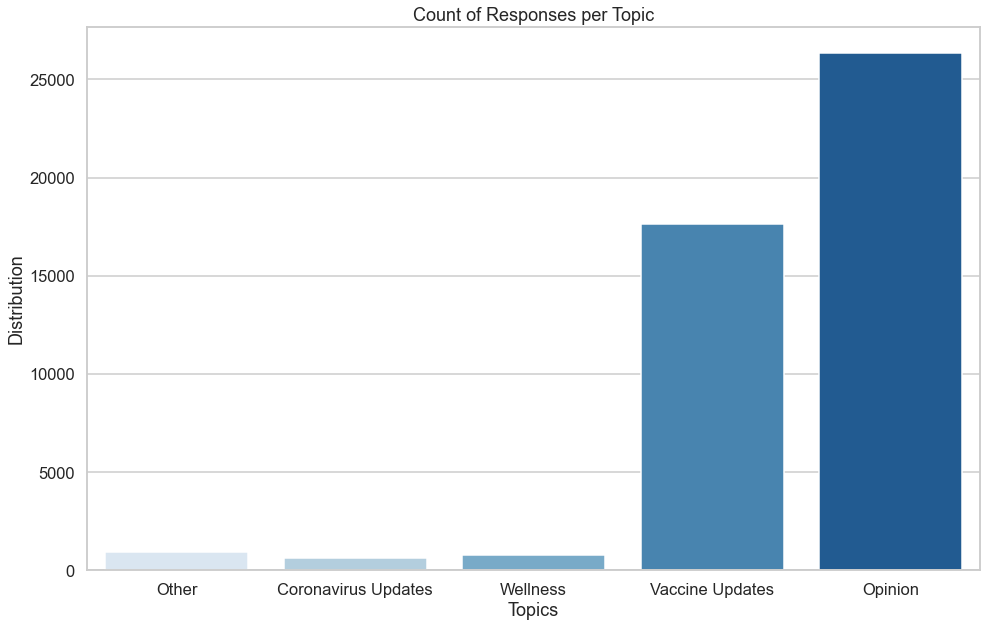

In [23]:
# visualize distribution of topics

#set plot style
sns.set_context('talk')
sns.set_style('whitegrid')
plt.figure(figsize=(16, 10)) 
#plot data
ax=sns.countplot(x='dominant_topic', data = df_dominant_topic,palette='Blues')
_=plt.ylabel('Distribution')
_=plt.xlabel('Topics')
_=plt.title('Count of Responses per Topic')
_=ax.set_xticklabels(TOPICS)

### Assign ratings within each topic

In [24]:
from collections import defaultdict
topic_text_df = defaultdict(list)

for topic in sorted(df_dominant_topic.dominant_topic.unique()):
    for rating, row in enumerate(df_dominant_topic[(df_dominant_topic.dominant_topic==topic)].sort_values('topic_perc_contrib', ascending=False).iterrows()):
        topic_text_df['topic'].append(topic)
        topic_text_df['text'].append(row[1].text)
        topic_text_df['rating'].append(rating+1)
        topic_text_df['tweet_id'].append(row[1].tweet_id)
        topic_text_df['index'].append(row[1].name)

topic_text_df = pd.DataFrame.from_dict(topic_text_df)

In [25]:
topic_text_df['topic_title']=topic_text_df.topic.map(TOPIC_MAP)

In [26]:
topic_text_df.set_index('index',inplace=True)

In [27]:
topic_text_df.head()

,topic,text,rating,tweet_id,topic_title
index,,,,,
18771,0.0,#DespiertaColombia #COVID1984 #PLANdemia🚫😷 #Ma...,1,1.366488e+18,Other
22140,0.0,SO IST ES ‼️\n#lockdown #Grundrechte #Freihe...,2,1.366442e+18,Other
28205,0.0,Allerdings...‼️\n#Corona #Lockerungen #Lockdow...,3,1.364961e+18,Other
5750,0.0,#DespiertaMundo #DespiertaColombia #COVID1984 ...,4,1.366171e+18,Other
5746,0.0,#DespiertaColombia #COVID1984 #PLANdemia #Mani...,5,1.366173e+18,Other


In [28]:
print(topic_text_df.topic.value_counts(),'\n',topic_text_df.topic.value_counts(normalize=True) )

4.0    26366
3.0    17612
0.0      939
2.0      760
1.0      647
Name: topic, dtype: int64 
 4.0    0.569165
3.0    0.380192
0.0    0.020270
2.0    0.016406
1.0    0.013967
Name: topic, dtype: float64


In [29]:
# see the top n rated tweets in t topic
p,n = 1,10 # tweets to print via rating number
tp = 4.0 # topic to print
[print('tweet {} | {} \n {}\n\n'.format(i,x[0],x[1])) for i, x in enumerate(zip(topic_text_df[(topic_text_df.topic==tp)][p:n].text.tolist(),topic_text_df[(topic_text_df.topic==tp)][p:n].index.tolist()))]

tweet 0 | @FrankDoolin @WHO @ansm @EMA_News @realDonaldTrump @narendramodi @PMOIndia @gvkbio @nsitharaman @IvankaTrump @UN @HMOIndia @BarackObama @USAndHyderabad @US_FDA @45_Schedule @HHSGov @DrSJaishankar @TelanganaCMO @EricTrump @DonaldJTrumpJr @EU_Commission @EmmanuelMacron @SecretService @DanScavino @USAndIndia @Mike_Pence @Trump @MELANIATRUMP @TiffanyATrump @LaraLeaTrump @GOP Oh!!! then why should entire globe unified to defeat him👇

#ChinaVirus + @WHO + #BigTech + #BigPharma + #Congress + #SCOTUS + #Democrats + #RINO #BLMRiots + #FakeNewsMedia 

He got 74.2M historic votes💪after facing this much huge opposition. Hence I called him as GOAT #POTUS🇺🇸 https://t.co/a6ODilnK6Y 
 22145


tweet 1 | Cont. Questions on mRNA/DNA so called 'vaccines'. including 1) mRNA genetic engineering. 2) Pathogenic priming. 3) Bells Pausey.3) Sudden death.3) Vax immunity compared to natural immunity cross reactive T cells. 4) Aborted fetal tissue &amp; vaccines. 5) Worst vax risks V covid 19. 
 5237


t

[None, None, None, None, None, None, None, None, None]

# Definitions of each topic<br>

### Topic 0.0 = Seems to capture a few different types of tweets. | Other ###
   - Words/tweets that may not directly relate to covid. (similar to topic 0.0 of 4 topics) Such as: <br>
   - It also captures repeated (or slightly altered) tweets. And reapeated Words within a tweet, tweets with mixed language <br> 
   - Some Coronavirus updates that have words and numbers vs full sentences:<br>
   - Lists where words don't necessarily follow a structured sentence. Seen in a list of hashtags, @mentions,  and link/retweet or a tweet with a list of symptoms, a list of city locations where vaccine is available.<br>
    <blockquote>Can some one book this Malome... 😁<br><br>
                @zodwalibram 😏 @moonchildsanelly<br><br>
                #mzanzimemes #mzanzi_beauty #mzanzihumor #zodwawabantu #moonchildsanelly #savanna #corona #sahiphopmusic #amapianoisalifestyle https://t.co/1HZpmkcxiu </blockquote><br><br>
          
### Topic 1.0 = Coronavirus Updates ###
- Tweets about updates to the number of cases, deaths, recovered, locations it's spread to, etc.
<blockquote> 21 States/UTs - #Odisha, MP, Assam, Rajasthan, Haryana, J&amp;K, AP, Goa, HP, Puducherry, Lakshadweep, Manipur, Sikkim, Tripura, Ladakh, Meghalaya, Mizoram, Nagaland, Ar. Pradesh, A&amp;N Islands, D&amp;D and D&amp;N - have not reported any #COVID19 deaths in last 24 hours: Ministry of Health </blockquote><br><br>
 
### Topic 2.0 = Immunity, health, recomendations |  Wellness ###
 - These tweets seem to include tweets about health and wellness, and ways to boost immunity. That do not directly pertain to covid. It could be because 'immunity' was a keyword that was used to capture these tweets.There are also tweets with repeated words/phrases, similar to what was found in topic 0.0 in the model with 4 topics.
     <blockquote>  Wellness Wednesday: Efficiency and Sustainability <br><br>
                    #WellnessWednesday #silage #density #microbasics #immunity #microbiome #natural #solutions #feedgooddogood #guthealth #converge #dairy #beef #poultry #aquaculture #chickens #calves #sheep #goats #pigs #health #gobacktobasics https://t.co/AkU4Cr0YZa <br>
 </blockquote><br><br>
 
### Topic 3.0 = Vaccine Updates ###
 - These tweets seem to include information on the vaccine. Distribution, doses administered, report updates, sites, news etc. It seems some of the coronavirus updates are also in this topic list.
     <blockquote> #NJ #COVID19 Case update for 3/1. <br><br>
    Reported: 2668<br>
    Adds: 2701<br>
    Deletions: 70<br>
    Net: 2631<br><br>
    Starting the month off right with 1134 cases which are more than 8+ days old. (40%). <br><br>
    60% are from 0-7 days, 1567 cases.<br><br>
    474 cases are from before Feb. (18% of all cases). <br>
    220 are 100+ days https://t.co/tO3mBQF7VT </blockquote><br><br>
                 
### Topic 4.0 = Coronavirus Updates |  Opinion ###
 - These tweets seem to include opinion on the pandemic and a mix of political views
     <blockquote> @FrankDoolin @WHO @ansm @EMA_News @realDonaldTrump @narendramodi @PMOIndia @gvkbio @nsitharaman @IvankaTrump @UN @HMOIndia @BarackObama @USAndHyderabad @US_FDA @45_Schedule @HHSGov @DrSJaishankar @TelanganaCMO @EricTrump @DonaldJTrumpJr @EU_Commission @EmmanuelMacron @SecretService @DanScavino @USAndIndia @Mike_Pence @Trump @MELANIATRUMP @TiffanyATrump @LaraLeaTrump @GOP Oh!!! then why should entire globe unified to defeat him👇<br><br>
    #ChinaVirus + @WHO + #BigTech + #BigPharma + #Congress + #SCOTUS + #Democrats + #RINO #BLMRiots + #FakeNewsMedia <br><br>
    He got 74.2M historic votes💪after facing this much huge opposition. Hence I called him as GOAT #POTUS🇺🇸 https://t.co/a6ODilnK6Y 
 </blockquote><br><br>
 
 
It appears that what separates this topic model from 4 topics, is that the other (0.0) topic was split, separating out 'wellness/health' type tweets into it's own category. The other topics seem to be pretty similar. Looking at the distribution of topics, it would appear that there are indeed three topics here. vaccine information, pandemic report updates, and personal opinion / political views when it comes to the pandemic. 4 or 5 topic modeling might help in differentiating tweets that do not belong in any of those three groups and removed. This hasn't been done in any of the following analysis. Another option is to move forward with 3 topics.
 

### View the topic tweets in each topic

In [30]:
twts_print=5 # number of top tweets per topic to print

for t in topic_text_df.topic_title.unique():
    for twt in range(1,twts_print+1):
        print('Topic: ',t, "---- Tweet {} of {}\n {} \n".format(twt,
                                                           twts_print,
                                                           topic_text_df[(topic_text_df.topic_title==t) & (topic_text_df.rating==twt)].text.values[0]))
        print(topic_text_df[(topic_text_df.topic_title==t) & (topic_text_df.rating==twt)].index.values[0],'\n')
        print('+++++++++'*5,'\n')

        

Topic:  Other ---- Tweet 1 of 5
 #DespiertaColombia #COVID1984 #PLANdemia🚫😷 #ManipulaciónMediatica #GranHermano2020 #CoronaMiedo #MiedoVirus #Event201 #Agenda2030 #GreatAwakening #BigPharma #NoVacunas 💉☠ #WarpSpeed Operation #NightingaleProject #BigReset  #GreatReset #DICTADURA #NWO

 https://t.co/TDP2BRyMRQ 

18771 

+++++++++++++++++++++++++++++++++++++++++++++ 

Topic:  Other ---- Tweet 2 of 5
 SO  IST  ES ‼️
#lockdown #Grundrechte #Freiheit #Grundgesetz #Merkel #BigPharma #Korruption #Pressefreiheit #Meinungsfreiheit #Impfzwang #Impfschaden #Impftote #esreicht #maskeauf
#StayHome #Friseure #DavosAgenda #NieMehrCDU #Corona #CoronaDiktatur #Impfapartheid #Diskriminierung https://t.co/j6di7X3yb3 

22140 

+++++++++++++++++++++++++++++++++++++++++++++ 

Topic:  Other ---- Tweet 3 of 5
 Allerdings...‼️
#Corona #Lockerungen #Lockdown4 #Grundrechte #GreatReset #BigPharma #BigData #BigTech #DavosAgenda #Korruption #Datenschutz #Laborpandemie #PCRGATE #Impfung #Impfzwang #Impfschaden #Impft

Topic:  Opinion ---- Tweet 4 of 5
 The HUGE FAIL by feds to build a pan-Cdn database for vax tracking..

..just latest eg no fed leadership re disease #surveillance 

-&gt; see BEAN-COUNTING admin data for chronic disease Dx..paying $1000s/yr to provs for spreadsheet count data (CCDSS) -&gt; flawed

#cdnpoli #vaccine https://t.co/A0vMhwXNn3 https://t.co/BdIPoI94lm 

42769 

+++++++++++++++++++++++++++++++++++++++++++++ 

Topic:  Opinion ---- Tweet 5 of 5
 @barron1946_john @Spiritual_Leo Republican #goals
Keep:
1. The Bill of Rights
2. The US Constitution
3. #mask a choice
4. #vaccine a choice
5. Ban abortion
5. Ban gender politics
6. Ban monopoly of tv,  news, tech, voter machines
8. Mandatory voter ID 
9. Illegals need citizenship or deport
10. Keep borders
.. 

24677 

+++++++++++++++++++++++++++++++++++++++++++++ 



In [31]:
dd=pd.merge(full_data,topic_text_df.drop(['tweet_id'],axis=1), how='left', left_index=True, right_index=True)

In [32]:
# add the distribution of topics
topics_df.columns = topic_cols

In [33]:
dd=pd.merge(dd,topics_df, how='left', left_index=True, right_index=True)

In [34]:
dd=pd.merge(dd,df_dominant_topic[['dominant_topic','topic_perc_contrib','keywords']], how='left', left_index=True, right_index=True)

In [35]:
# check for duplicate tweets
dd.duplicated(subset=['full_text']).sum()

0

In [36]:
dd.to_csv(data_path+'\\'+'topics_data_5_topics.csv', index=False)